In [1]:
from pandas import read_csv, DataFrame

filename = "./DataEncoding.csv"
file_tag = "class_pos_covid"
data: DataFrame = read_csv(filename)
data.shape

(380932, 45)

**Approaches Missing Values Impotation**\
1)\
Numeric: 'PhysicalHealthDays','MentalHealthDays' -> median, Others: mean\
Binary: most_frequent
Symbolic: most_frequent\
2)\
Numeric: 'SleepHours','HeightInMeters' -> mean, Others: median
Binary: drop
Symbolic:

In [2]:
from numpy import ndarray
from pandas import concat,DataFrame
from sklearn.impute import SimpleImputer, KNNImputer
from library.dslabs_functions import get_variable_types


def mvi_by_filling(data: DataFrame, strategy: str = "frequent") -> DataFrame:
    df: DataFrame
    variables: dict = get_variable_types(data)
    stg_num, v_num = "mean", -1
    stg_sym, v_sym = "most_frequent", "NA"
    stg_bool, v_bool = "most_frequent", False
    if strategy != "knn":
        lst_dfs: list = []
        if strategy == "constant":
            stg_num, stg_sym, stg_bool = "constant", "constant", "constant"
        if len(variables["numeric"]) > 0:
            imp = SimpleImputer(strategy=stg_num, fill_value=v_num, copy=True)
            tmp_nr = DataFrame(
                imp.fit_transform(data[variables["numeric"]]),
                columns=variables["numeric"],
            )
            lst_dfs.append(tmp_nr)
        if len(variables["symbolic"]) > 0:
            imp = SimpleImputer(strategy=stg_sym, fill_value=v_sym, copy=True)
            tmp_sb = DataFrame(
                imp.fit_transform(data[variables["symbolic"]]),
                columns=variables["symbolic"],
            )
            lst_dfs.append(tmp_sb)
        if len(variables["binary"]) > 0:
            imp = SimpleImputer(strategy=stg_bool, fill_value=v_bool, copy=True)
            tmp_bool = DataFrame(
                imp.fit_transform(data[variables["binary"]]),
                columns=variables["binary"],
            )
            lst_dfs.append(tmp_bool)
        df = concat(lst_dfs, axis=1)
    else:
        imp = KNNImputer(n_neighbors=5)
        imp.fit(data)
        ar: ndarray = imp.transform(data)
        df = DataFrame(ar, columns=data.columns)
    return df

In [3]:
# Create df for approach #1
df_Approach1 = data.copy()
df_Approach1.shape

(380932, 45)

In [4]:
##################################################################   APPROACH #1  #########################################################################

In [5]:
#Numeric Variables 
import numpy as np
median = ['PhysicalHealthDays', 'MentalHealthDays']
for var in median:
    imp = SimpleImputer(strategy="median")
    df_Approach1[var] = imp.fit_transform(df_Approach1[[var]])

mean = ['SleepHours', 'HeightInMeters', 'WeightInKilograms']
for var in mean:
    imp = SimpleImputer(strategy="mean")
    df_Approach1[var] = imp.fit_transform(df_Approach1[[var]])

df_Approach1['BMI'] = df_Approach1.apply(lambda row: row['WeightInKilograms'] / (row['HeightInMeters'] ** 2) if np.isnan(row['BMI']) else row['BMI'],axis=1)
df_Approach1.shape

(380932, 45)

In [6]:
# Binary Variables 
binary =['Sex','PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']
for var in binary:
    imp = SimpleImputer(strategy="most_frequent")
    df_Approach1[var] = imp.fit_transform(df_Approach1[[var]])
df_Approach1.shape

(380932, 45)

In [7]:
# Symbolic Variables
symbolic = ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'HadDiabetes', 'RaceEthnicityCategory','TetanusLast10Tdap']
for var in symbolic:
    imp = SimpleImputer(strategy="most_frequent")
    df_Approach1[var] = imp.fit_transform(df_Approach1[[var]])
df_Approach1.shape

(380932, 45)

In [8]:
df_Approach1.to_csv("./MVI-Approach1.csv", index=False)

{'GaussianNB': GaussianNB(), 'BernoulliNB': BernoulliNB()}
{'accuracy': 0.6464385719285964, 'recall': 0.4164717874917551, 'precision': 0.39878850515315933, 'auc': 0.5788460808303746, 'f1': 0.40743836801736405}
1
5
10
15
20
25
{'accuracy': 0.6091179558977949, 'recall': 0.33288361216046053, 'precision': 0.33121532128154646, 'auc': 0.5279263722270805, 'f1': 0.33204737125426165}


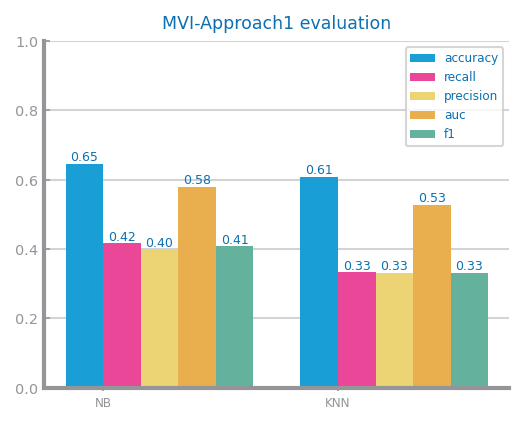

In [9]:
# Evaluation Approach#1
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split


# Split the DataFrame into train and test
train, test = train_test_split(df_Approach1, test_size=0.3, random_state=42)

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "MVI-Approach1"
#train: DataFrame = read_csv("./data_MVI-Approach1_train.csv")
#test: DataFrame = read_csv("./data_MVI-Approach1_test.csv")

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"./{file_tag}_eval.png")
show()

In [10]:
##################################################################   APPROACH #2  #########################################################################

In [11]:
# Create df for approach #2
df_Approach2 = data.copy()
df_Approach2.shape

(380932, 45)

In [12]:
from library.dslabs_functions import mvi_by_dropping
df_Approach2.dropna(how="any", inplace=True)
df_Approach2.shape

(237630, 45)

In [13]:
df_Approach2.to_csv("./MVI-Approach2.csv", index=False)

{'GaussianNB': GaussianNB(), 'BernoulliNB': BernoulliNB()}
{'accuracy': 0.6465653887696559, 'recall': 0.4125830959164293, 'precision': 0.40387654550525237, 'auc': 0.5786262549999633, 'f1': 0.4081833983182225}
1
5
10
15
20
25
{'accuracy': 0.6074850257402965, 'recall': 0.33774928774928775, 'precision': 0.33634386230376395, 'auc': 0.529164516259123, 'f1': 0.3370451099317665}


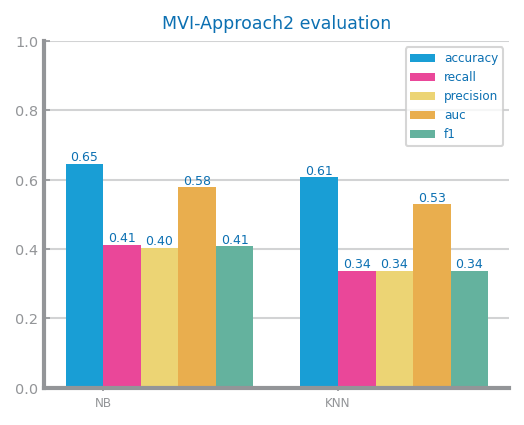

In [14]:
# Evaluation Approach#1
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from library.dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_KNN,run_NB
from sklearn.model_selection import train_test_split


# Split the DataFrame into train and test
train, test = train_test_split(df_Approach2, test_size=0.3, random_state=42)

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "CovidPos"
file_tag = "MVI-Approach2"
#train: DataFrame = read_csv("./data_MVI-Approach1_train.csv")
#test: DataFrame = read_csv("./data_MVI-Approach1_test.csv")

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"./{file_tag}_eval.png")
show()